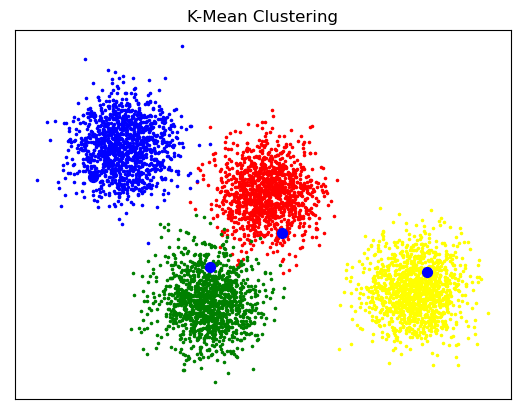

In [7]:
from sklearn.cluster import kmeans_plusplus
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plot
import pandas as pd
import numpy as np


n_sample = 5000
n_component = 4

X, y_true = make_blobs(
    n_samples=n_sample, centers=n_component, cluster_std=0.60, random_state=0
)
X = X[:, ::-1]


centers_init, indices = kmeans_plusplus(X, n_clusters=4, random_state=0)


plot.figure(1)
colors = ["red", "blue", "green", "yellow"]

for k, col in enumerate(colors):
    cluster_data = y_true == k
    plot.scatter(X[cluster_data, 0], X[cluster_data, 1], c=col, marker=".", s=10)

plot.scatter(centers_init[:, 0], centers_init[:, 1], c="b", s=50)
plot.title("K-Mean Clustering")
plot.xticks([])
plot.yticks([])
plot.show()

In [10]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

df = pd.read_csv('bottle.csv', encoding = 'unicode_escape')
df = df.reset_index()
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(999, inplace=True)
df_binary = df[['Salnty', 'T_degC']]

# Taking only the selected two attributes from the dataset
df_binary.columns = ['Sal', 'Temp']
#display the first 5 rows
df_binary.head()
X = np.array(df_binary['Sal']).reshape(-1, 1)
y = np.array(df_binary['Temp']).reshape(-1, 1)
df_binary.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  
# Splitting the data into training and testing data
regr = LinearRegression()
  
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
  
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
  
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

C:\Users\HP\AppData\Local\Temp\ipykernel_13360\632898726.py:5: DtypeWarning: Columns (47,61) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('bottle.csv', encoding = 'unicode_escape')


0.10498656673522733
MAE: 22.62708154562715
MSE: 10889.539832340424
RMSE: 104.35295794724951


C:\Users\HP\AppData\Local\Temp\ipykernel_13360\632898726.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary.dropna(inplace = True)
